# EOPatch visualization

This tutorial showcases `EOPatch` visualization functionalities. We are going to load and visualize features from _TestEOPatch_.

In [1]:
!pip install eo-learn.core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=227e4f1f65ee135dedf0ed4c2c5b350e05f63c4691ae2caee9b328eacb8d9165
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e

In [2]:
!pip install eo-learn

In [3]:
# Cloud authentication.
from google.colab import auth, drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%matplotlib inline

from eolearn.core import EOPatch, FeatureType
import os

In [7]:
PACKAGE_PATH = '/content/drive/MyDrive/AI_LU_LC_Imbabura'
os.chdir (PACKAGE_PATH)

In [8]:
!pwd

/content/drive/MyDrive/AI_LU_LC_Imbabura


In [26]:
# Locations for save epopatches
EOPATCH_PATH = os.path.join(PACKAGE_PATH, "eopatches")
#EOPATCH_PATH = os.path.join(PACKAGE_PATH, "eopatches_sampled")
#EOPATCH_PATH = os.path.join("..", "..", "example_data", "TestEOPatch")

In [27]:
EOPATCH_O = os.path.join(EOPATCH_PATH, "eopatch_0")

In [28]:
eopatch=EOPatch.load(EOPATCH_O)
eopatch

EOPatch(
  bbox=BBox(((783588.6840442204, 48061.647058823524), (790116.4173129275, 52974.882352941175)), crs=CRS('32617'))
  timestamps=[2022-01-11 15:43:09, ...]<length=43>
  vector_timeless={
    LULC_REFERENCE: geopandas.GeoDataFrame(columns=['DN', 'layer', 'path', 'lulcid', 'lulcname', 'geometry'], length=173, crs=EPSG:32617)
  }
  mask={
    CLM: numpy.ndarray(shape=(43, 491, 653, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(43, 491, 653, 1), dtype=bool)
    IS_VALID: numpy.ndarray(shape=(43, 491, 653, 1), dtype=bool)
  }
  mask_timeless={
    LULC: numpy.ndarray(shape=(491, 653, 1), dtype=uint8)
    VALID_COUNT: numpy.ndarray(shape=(491, 653, 1), dtype=int64)
  }
  data={
    BANDS: numpy.ndarray(shape=(43, 491, 653, 6), dtype=float32)
    CLP: numpy.ndarray(shape=(43, 491, 653, 1), dtype=uint8)
    NDBI: numpy.ndarray(shape=(43, 491, 653, 1), dtype=float32)
    NDVI: numpy.ndarray(shape=(43, 491, 653, 1), dtype=float32)
    NDWI: numpy.ndarray(shape=(43, 491, 653, 1), dtyp

In [29]:
eopatch.get_features()

[(<FeatureType.DATA: 'data'>, 'CLP'),
 (<FeatureType.DATA: 'data'>, 'NDBI'),
 (<FeatureType.DATA: 'data'>, 'NDWI'),
 (<FeatureType.DATA: 'data'>, 'NDVI'),
 (<FeatureType.DATA: 'data'>, 'BANDS'),
 (<FeatureType.MASK: 'mask'>, 'IS_DATA'),
 (<FeatureType.MASK: 'mask'>, 'CLM'),
 (<FeatureType.MASK: 'mask'>, 'IS_VALID'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'VALID_COUNT'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'LULC'),
 (<FeatureType.VECTOR_TIMELESS: 'vector_timeless'>, 'LULC_REFERENCE')]

## Basics

All visualizations can be done simply by calling `EOPatch.plot` method, however calling this method still requires that Dependencies `eo-learn[VISUALIZATION]` are installed.

Plotting a simple timeless single-channel feature produces a single-image plot. Plotting method always returns a 2D grid of `AxesSubplot` objects which can be further customized before a plot is produced.

In [30]:
axes_grid = eopatch.plot((FeatureType.DATA, "NDVI"))

print("A 2D grid:", axes_grid)

figure = axes_grid[0][0].figure
figure.set_dpi(40)

Output hidden; open in https://colab.research.google.com to view.

## Plotting filters and configurations

Let's plot a feature containing Sentinel-2 bands. It will create a grid of subplots where every row contains images for the same timestamp and every column contains images from the same channel.

Because plotting a grid of `68 x 13` images would take too much time and memory we'll use filters to plot only some timestamps and channels. Filtering parameters support either a slice object or a list of indices to keep. Additionally, we can write the names of channels to be written next to each image.

We can also select any 3 channels and plot RGB images.

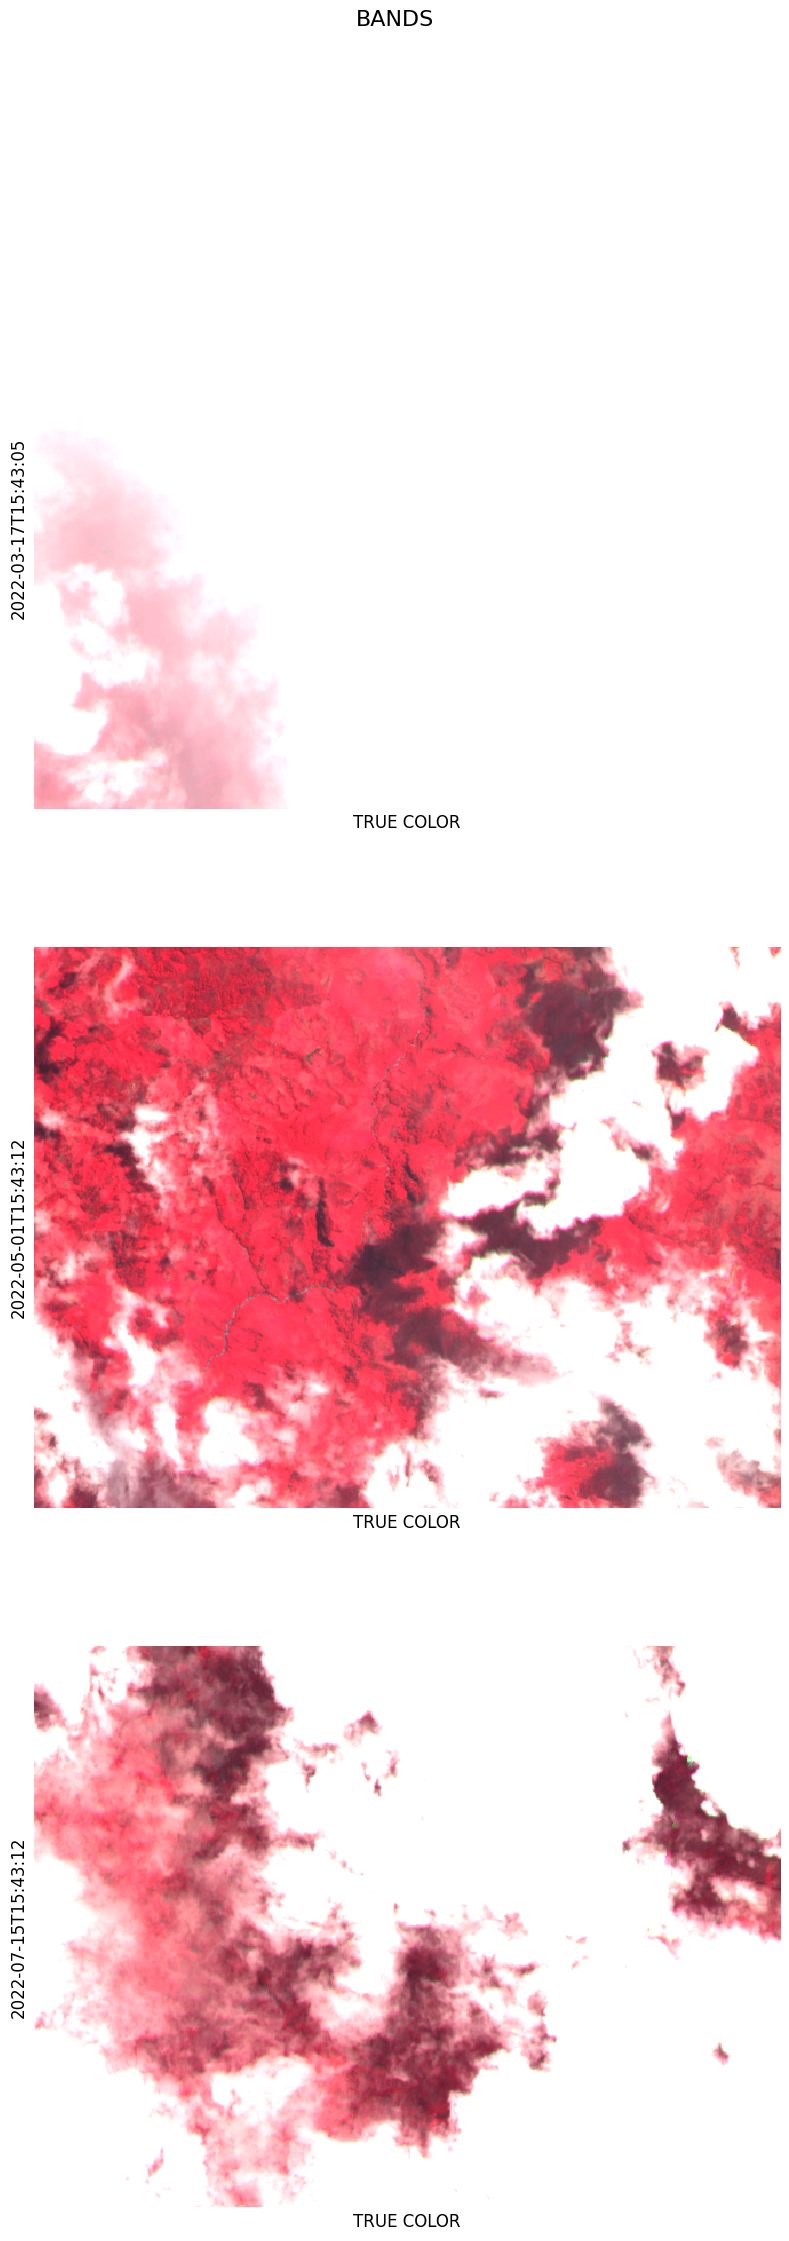

In [33]:
eopatch.plot((FeatureType.DATA, "BANDS"), times=[4, 10, 20], rgb=[3, 2, 1], channel_names=["TRUE COLOR"]);

Plotting also supports plenty of advanced low-level configuration options. Those can be configured with a `PlotConfig` object.

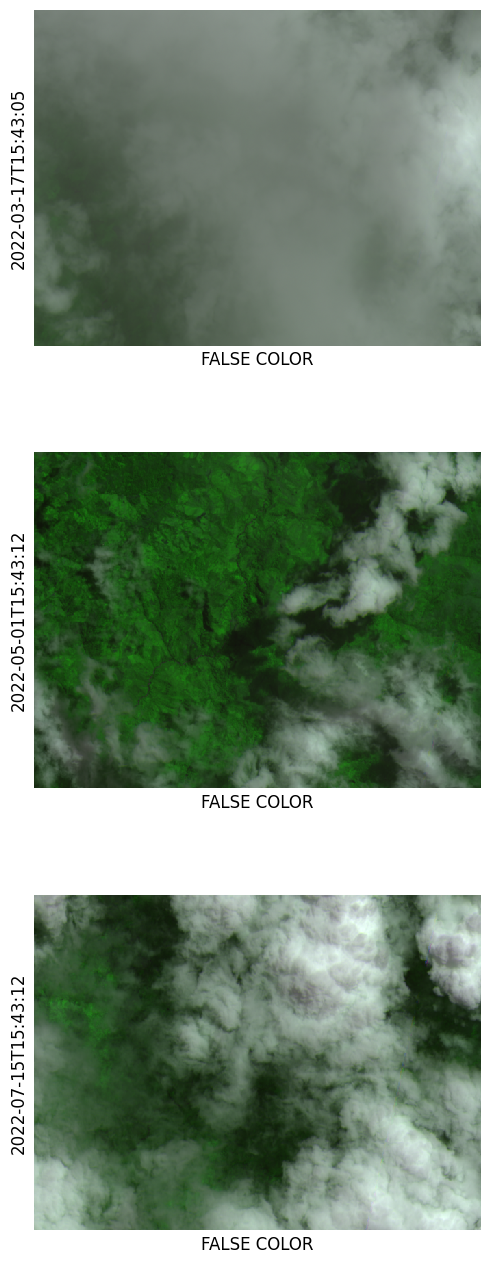

In [49]:
from eolearn.visualization import PlotConfig

config = PlotConfig(subplot_width=5, subplot_height=5, rgb_factor=1, show_title=False)

eopatch.plot(
    (FeatureType.DATA, "BANDS"), times=[4, 10, 20], rgb=[1, 3, 2], channel_names=["FALSE COLOR"], config=config
);

## Types of plots

Next, let's check what kind of plots other feature types produce. Non-spatial temporal raster features are plotted as time series of values.

Timeless non-spatial raster features produce histogram plots.

In [45]:
eopatch[FeatureType.VECTOR_TIMELESS, "LULC_REFERENCE"].head()

,DN,layer,path,lulcid,lulcname,geometry
0,2,17N_20220101-20223112-LU-LC-clip,D:/FICA/Proyectos/PredictSoilErosion/Cartograf...,2,forest,"MULTIPOLYGON (((692200.000 97200.000, 696090.0..."
1,11,17N_20220101-20223112-LU-LC-clip,D:/FICA/Proyectos/PredictSoilErosion/Cartograf...,3,grassland,"MULTIPOLYGON (((783990.000 50020.000, 784020.0..."
2,11,17N_20220101-20223112-LU-LC-clip,D:/FICA/Proyectos/PredictSoilErosion/Cartograf...,3,grassland,"MULTIPOLYGON (((783810.000 50480.000, 783880.0..."
3,2,17N_20220101-20223112-LU-LC-clip,D:/FICA/Proyectos/PredictSoilErosion/Cartograf...,2,forest,"MULTIPOLYGON (((783590.000 50950.000, 783630.0..."
4,2,17N_20220101-20223112-LU-LC-clip,D:/FICA/Proyectos/PredictSoilErosion/Cartograf...,2,forest,"MULTIPOLYGON (((783670.000 51150.000, 783710.0..."


Vector features are plotted together with an `EOPatch` bounding box.

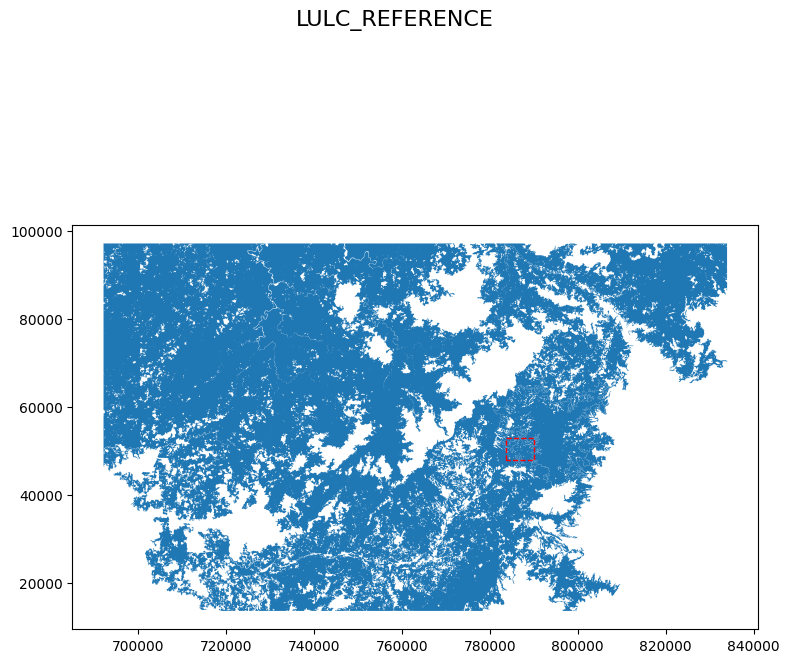

In [44]:
eopatch.plot((FeatureType.VECTOR_TIMELESS, "LULC_REFERENCE"));